In [1]:
# from IPython.display import display, HTML
# import matplotlib.pyplot as plt
# import matplotlib.ticker as ticker
# import io, base64
# import numpy as np
# from time import time
# from adTax import *
# from htmlTable import *

In [2]:
%run htmlTable

In [3]:
%run adTax

In [4]:
# bracket thresholds
b0 = [0, 5, 10, 15, 20, 25, 30, 35, 40, 50, 60]
# rates
r0 = [0, 0.05, 0.125, 0.20, 0.275, 0.35, 0.425, 0.50, 0.575, 0.65, 0.725 ]


In [5]:
marg_rates = table_marg_rates(b0, r0)
display(HTML(marg_rates))

For Revenue Between Marginal Tax Rate
0 and 5 billion 0.0%
5 and 10 billion 5.0%
10 and 15 billion 12.5%
15 and 20 billion 20.0%
20 and 25 billion 27.5%
25 and 30 billion 35.0%
30 and 35 billion 42.5%
35 and 40 billion 50.0%
40 and 50 billion 57.5%
50 and 60 billion 65.0%


In [6]:
revenue_tax = table_revenue_tax(b0, r0)
display(HTML(revenue_tax)) 

Year Total Revenue Tax Due (billion) (billion)
2018 82.0 11.1
2019 99.1 16.5
2020 115.2 21.8
2021 145.3 35.2
2022 169.2 46.1
2023 192.8 58.3


In [7]:
# Content for load-tables.js
s1 = '(function() {document.getElementById("marginal-rate-table-default").innerHTML = '
s1 += repr(marg_rates) + '})();\n\n'
s1 += '(function() {document.getElementById("total-revenue-table-default").innerHTML = '
s1 += repr(revenue_tax) + '})();'


In [8]:
with open('../js/load-tables.js', 'w') as f:
    f.write(s1)

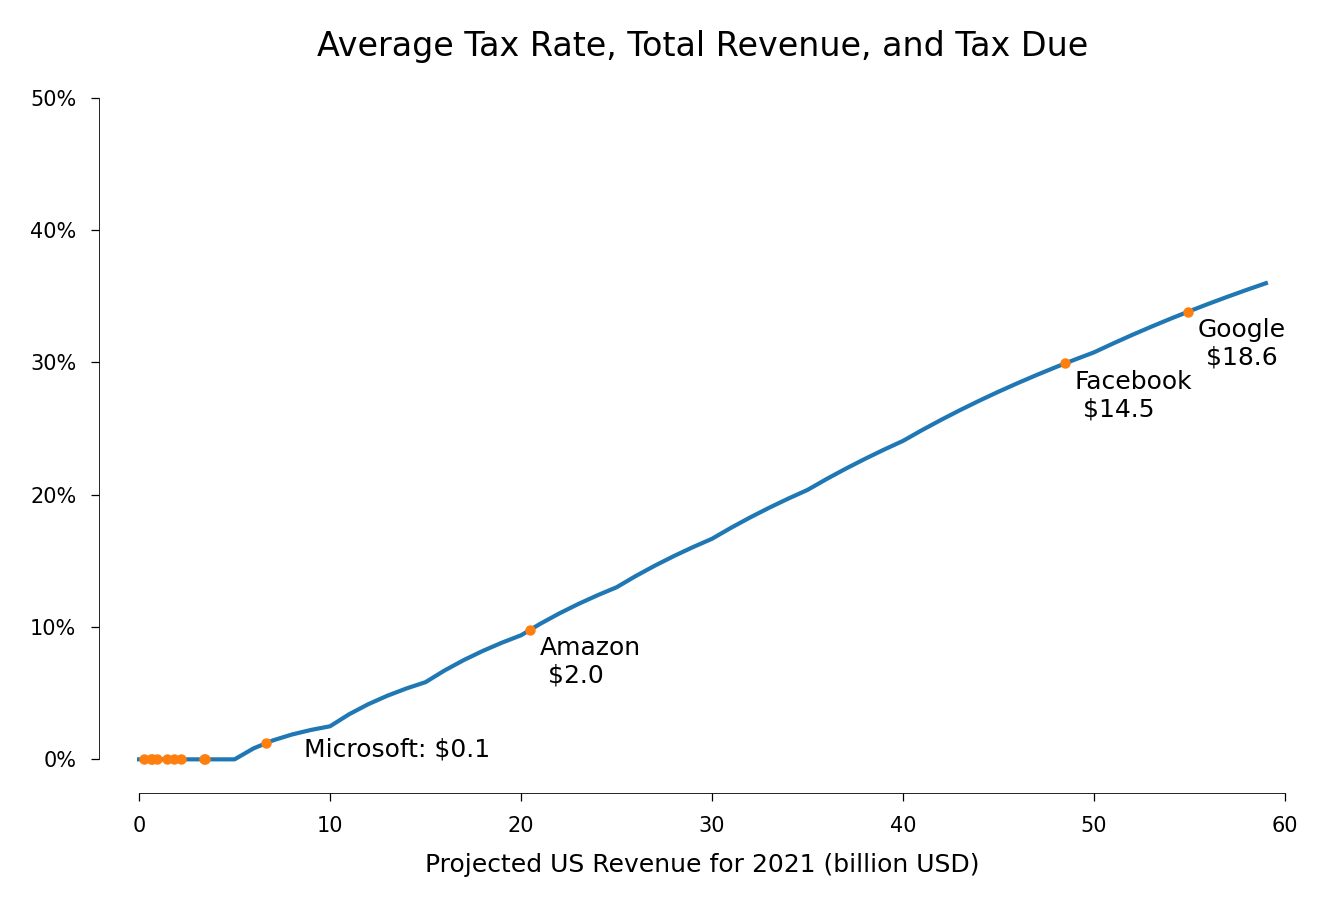

In [9]:
us_img_str = us_fig(b0,r0)

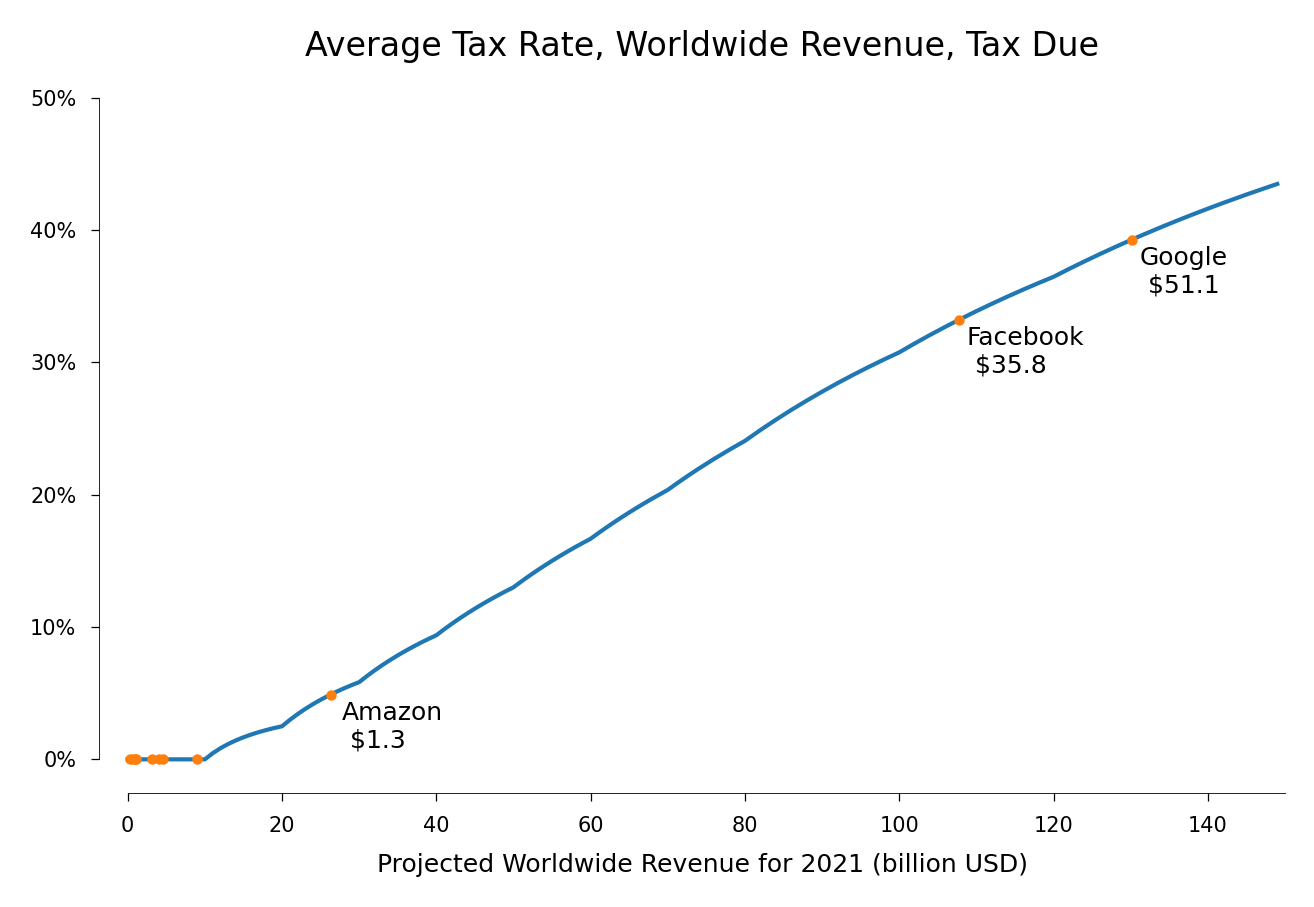

In [10]:
b2 = [2 * bracket for bracket in b0]

ww_img_str = ww_fig(b2, r0)